In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
tickers = ["AAPL", "MSFT", "NVDA", "GOOG", "ADI", "CRM", "ORCL", "SNPS", "ZM", "U", "JNJ", "PFE", "UNH", "MRK", "DHR", "ISRG", "ZTS", "SYK", "ILMN", "REGN", "JPM", "GS", "MS", "BLK", "SPGI", "CME", "AXP", "BAC", "SCHW", "AMZN", "TSLA", "HD", "NKE", "RACE", "TGT", "MCD", "LULU", "SBUX", "DIS", "PG", "KO", "PEP", "COST", "MDLZ", "WMT", "CL", "GIS", "KHC", "MO", "XOM", "CVX", "COP", "EOG", "SLB", "HAL", "BP", "ENB", "PSX", "NEE", "DUK", "SO", "AEP", "ES", "ED", "SRE", "PCG", "XEL", "PPL", "HON", "BA", "GE", "CAT", "MMM", "UPS", "DE", "LMT", "ROP", "WM", "BHP", "RIO", "LIN", "FCX", "NUE", "APD", "DOW", "SHW", "NEM", "VMC", "AMT", "PLD", "WELL", "EQIX", "SPG", "AVB", "ESS", "EQR", "HST", "O", "VZ", "T", "NFLX", "CMCSA", "TMUS", "TTWO", "NWS"]

In [ ]:
# Parameters
start_date = '2018-01-01'
end_date = '2023-01-01'

# Download historical price data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

[*********************100%***********************]  105 of 105 completed


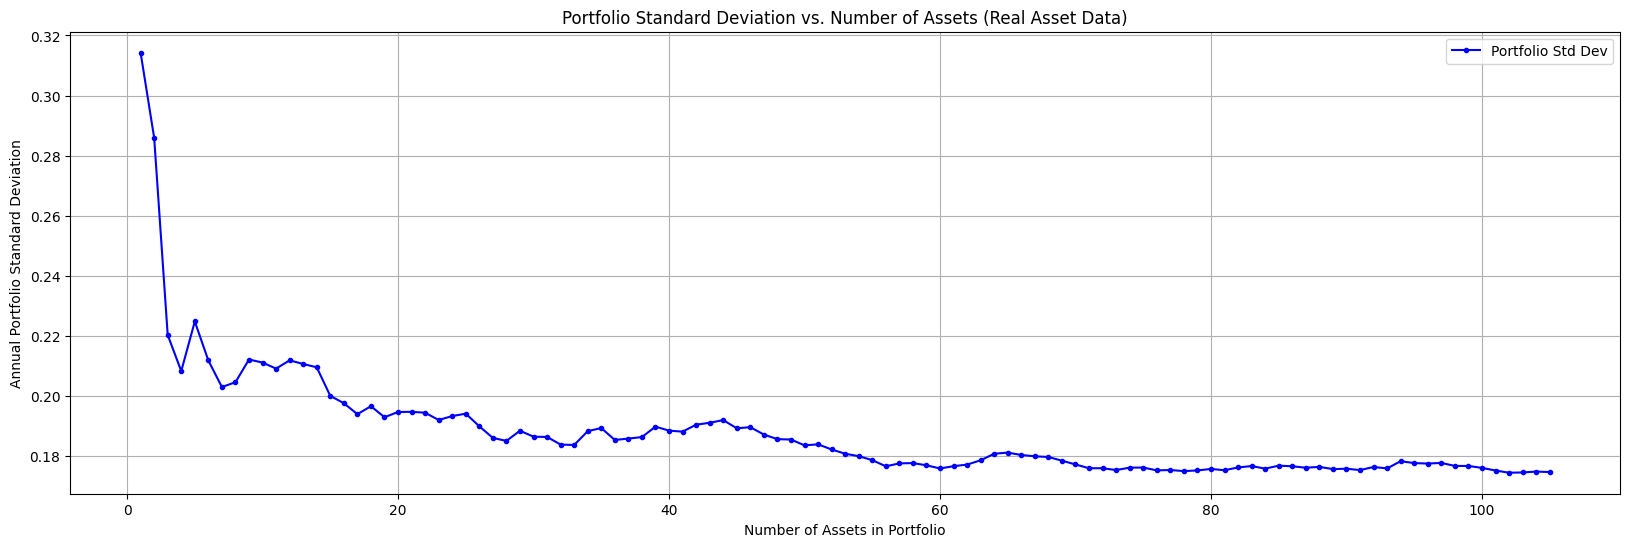

In [14]:
# Initialize lists to store results
num_assets = len(tickers)
portfolio_std_devs = []

# Calculate portfolio standard deviation as we add more assets
for i in range(1, num_assets + 1):
    # Select the first 'i' assets
    selected_returns = returns.iloc[:, :i]
    
    # Calculate the portfolio standard deviation with equal weights
    equal_weights = np.ones(i) / i
    portfolio_cov_matrix = selected_returns.cov()
    portfolio_variance = np.dot(equal_weights.T, np.dot(portfolio_cov_matrix, equal_weights))
    portfolio_std_devs.append(np.sqrt(portfolio_variance) * np.sqrt(252))  # Annualize std deviation

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(range(1, num_assets + 1), portfolio_std_devs, marker='.', linestyle='-', color='b', label='Portfolio Std Dev')
plt.xlabel('Number of Assets in Portfolio')
plt.ylabel('Annual Portfolio Standard Deviation')
plt.title('Portfolio Standard Deviation vs. Number of Assets (Real Asset Data)')
plt.grid(True)
plt.legend()
plt.show()